# 2.5 Projects table

In [2]:
import numpy as np
from numpy.random import randn
import pandas as pd
from pandas import Series, DataFrame

In [12]:
#reference: https://archive.ics.uci.edu/ml/datasets/automobile

address = 'C:/Users/Moanesga/Desktop/Data/Autos/imports-85(names+data).csv'
auto = pd.read_csv(address,delimiter= ';')
auto.columns = ['symboling','normalized-losses','make','fuel-type',
               'aspiration','num-of-doors','body-style','drive-wheels',
               'engine-location','wheel-base','length', 'width',
               'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
               'engine-size','fuel-system','bore','stroke','compression-ratio',
               'horsepower','peak-rpm','city-mpg','highway-mpg','price']
auto.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [13]:
#Missing Attribute Values: (denoted by "?")
auto = auto.replace("?", np.nan)

In [14]:
import scipy 
from scipy import stats

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

In [15]:
#!pip install missingno

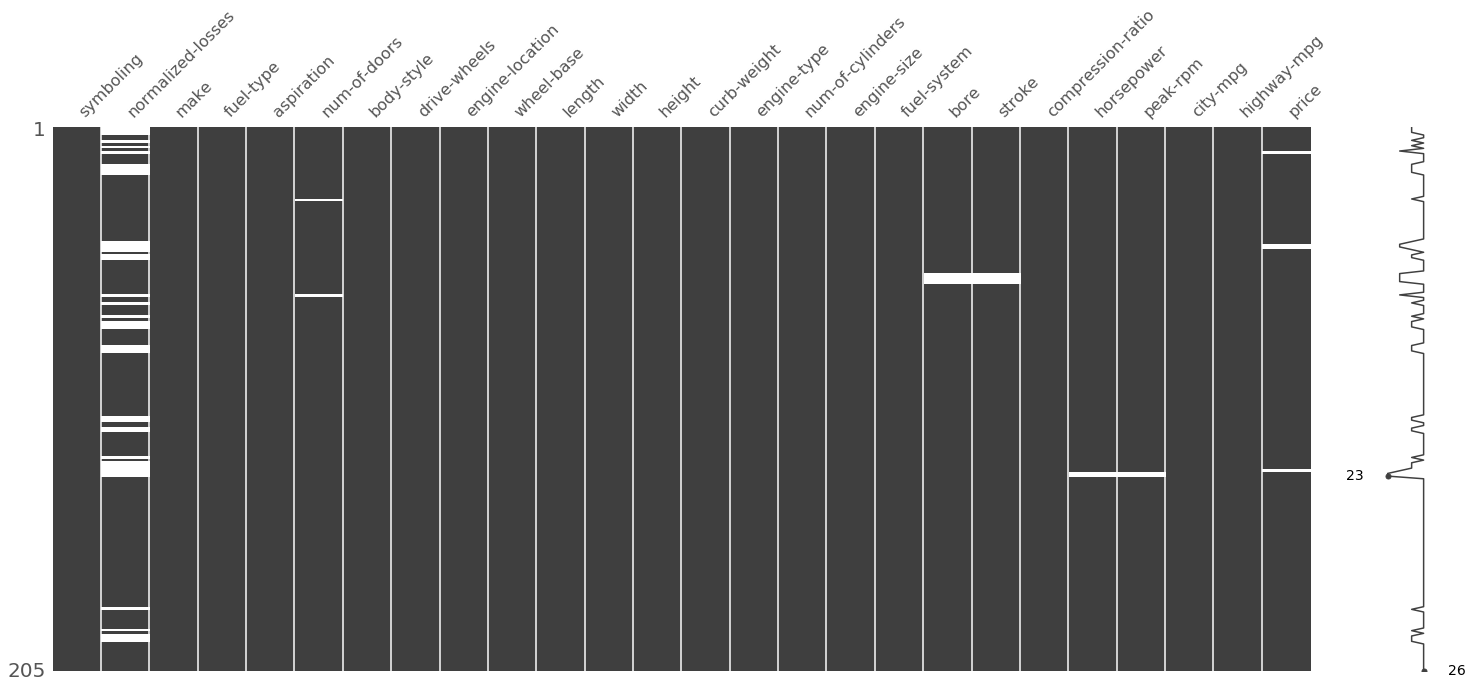

In [16]:
import missingno as msno
%matplotlib inline
rcParams['figure.figsize'] = 33, 11
symboling_NaN = msno.matrix(auto)


At a glance, normalized losses has the maximum n/a values, 23 in total, nevertheless sample seems to be in a good level of completeness for the relevant variables of the analysis. Price is a critical variable with major importance, joined with volume it will be posible cost project estimation. 

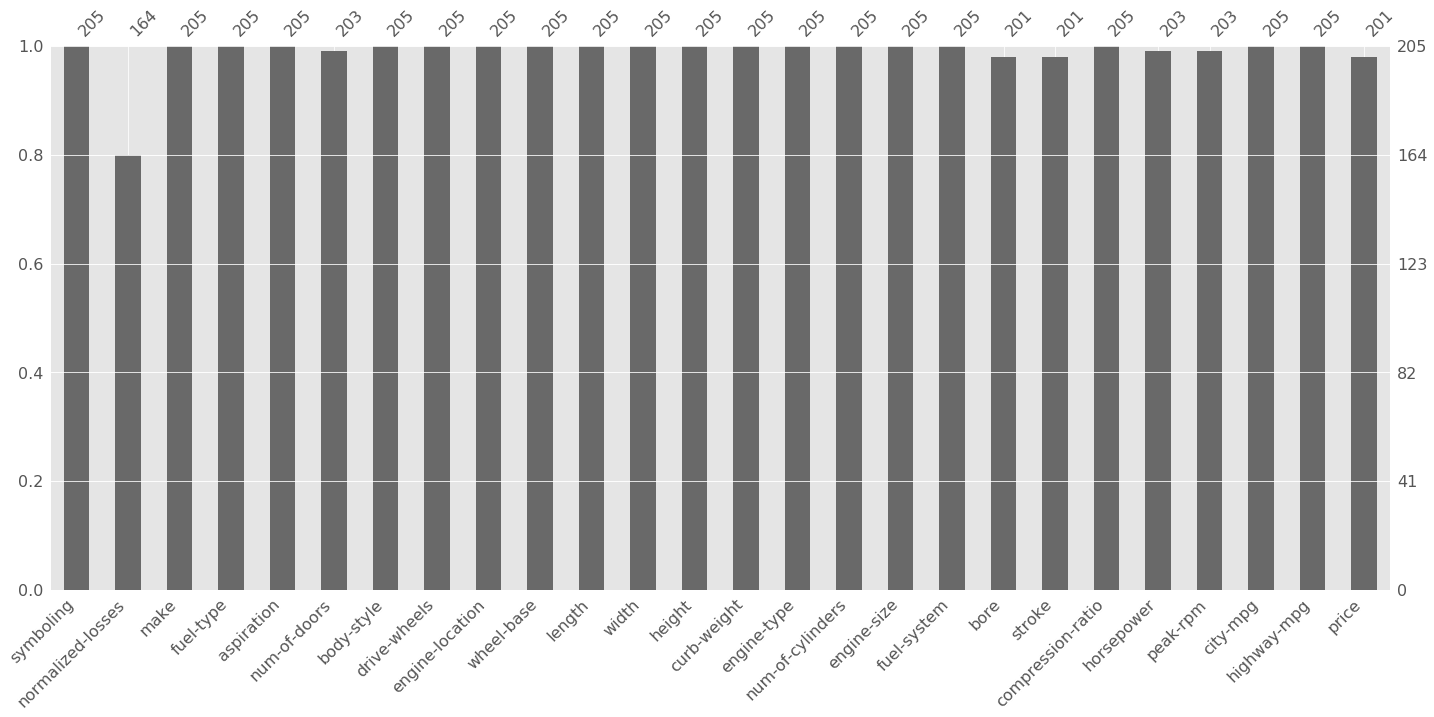

In [17]:
%matplotlib inline
rcParams['figure.figsize'] = 33, 11
msno.bar(auto)

Application of imputation methods could be next step, however since incomplete variables do not add practical value,these were not applied. To keep real price records sample size was be reduced from 205 o 201, which does not represent high data loss.

In [19]:
selected_variables = pd.DataFrame(auto, columns =['symboling','make','fuel-type','engine-type','price'])
selected_variables.describe(include='all')

,symboling,make,fuel-type,engine-type,price
count,205.000000,205,205,205,201
unique,NaN,22,2,7,186
top,NaN,toyota,gas,ohc,8921
freq,NaN,32,185,148,2
mean,0.834146,NaN,NaN,NaN,NaN
std,1.245307,NaN,NaN,NaN,NaN
min,-2.000000,NaN,NaN,NaN,NaN
25%,0.000000,NaN,NaN,NaN,NaN
50%,1.000000,NaN,NaN,NaN,NaN
75%,2.000000,NaN,NaN,NaN,NaN


In [36]:
# sample shows 22 manufacturers
OEM = selected_variables.groupby('make',as_index=True)['symboling'].count()
OEM_1 = pd.DataFrame(OEM, columns =['symboling'])
OEM_1.head(5)

,symboling
make,
alfa-romero,3
audi,7
bmw,8
chevrolet,3
dodge,9


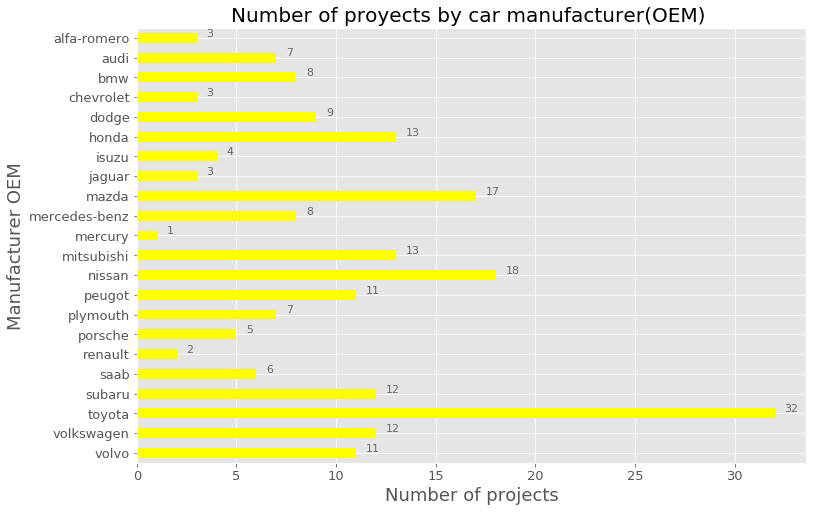

In [74]:
%matplotlib inline
plt.style.use('ggplot')
rcParams['figure.figsize'] = 12, 8

ax = OEM_1['symboling'].plot(kind='barh',color = 'yellow',fontsize=13)

plt.title("Number of proyects by car manufacturer(OEM) ",fontsize=20, color='black')
ax.set_xlabel("Number of projects", fontsize=18)
ax.set_ylabel("Manufacturer OEM", fontsize=18)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.5, i.get_y()+.18, \
            str(round((i.get_width()), 2)), fontsize=11, color='dimgrey')

ax.invert_yaxis()

In [62]:
# converting price to number
x = selected_variables['price']
x_1 = pd.to_numeric(x, errors='ignore')

In [67]:
# average car price per manufacturer
selected_variables['price_2'] = x_1
selected_variables.head(5)

,symboling,make,fuel-type,engine-type,price,price_2
0,3,alfa-romero,gas,dohc,13495,13495.0
1,3,alfa-romero,gas,dohc,16500,16500.0
2,1,alfa-romero,gas,ohcv,16500,16500.0
3,2,audi,gas,ohc,13950,13950.0
4,2,audi,gas,ohc,17450,17450.0


In [72]:
price = selected_variables.groupby('make',as_index=True)['price_2'].mean()
price_1 = pd.DataFrame(price, columns =['price_2'])

Text(0,0.5,'Manufacturer OEM')

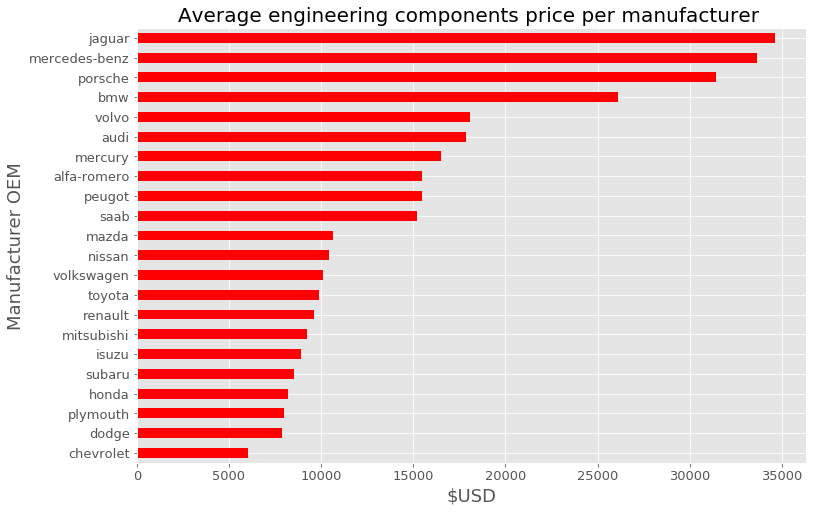

In [88]:
%matplotlib inline
plt.style.use('ggplot')
rcParams['figure.figsize'] = 12, 8

prices_sorted = price_1.sort_values('price_2',ascending=True)
ax1 = prices_sorted['price_2'].plot(kind='barh',color = 'red',fontsize=13)

plt.title("Average engineering components price per manufacturer ",fontsize=20, color='black')
ax1.set_xlabel("$USD", fontsize=18)
ax1.set_ylabel("Manufacturer OEM", fontsize=18)

In [94]:
# Projects by engine-type
engine = selected_variables.groupby('engine-type',as_index=True)['symboling'].count()
engine = pd.DataFrame(engine, columns =['symboling'])

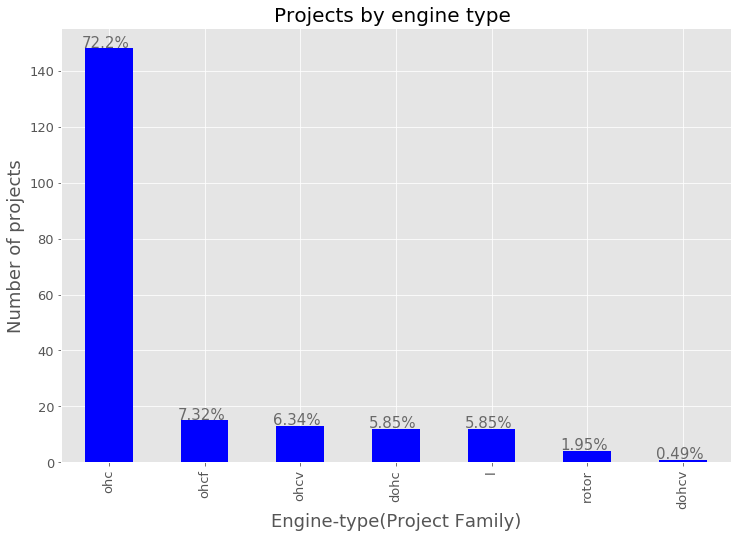

In [107]:
%matplotlib inline
plt.style.use('ggplot')
rcParams['figure.figsize'] = 12, 8

engine_1 = engine.sort_values('symboling',ascending=False)
ax2 = engine_1['symboling'].plot(kind='bar',color = 'blue',fontsize=13)

plt.title("Projects by engine type ",fontsize=20, color='black')
ax2.set_xlabel("Engine-type(Project Family)", fontsize=18)
ax2.set_ylabel("Number of projects", fontsize=18)

totals = []

# find the values and append to list
for i in ax2.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax2.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax2.text(i.get_x()-.03, i.get_height()+.5, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='dimgrey')


In [127]:
# Projects by fuel-type
fuel = selected_variables.groupby('fuel-type',as_index=True)['symboling'].count()
fuel = pd.DataFrame(fuel, columns =['symboling'])
fuel

,symboling
fuel-type,
diesel,20
gas,185


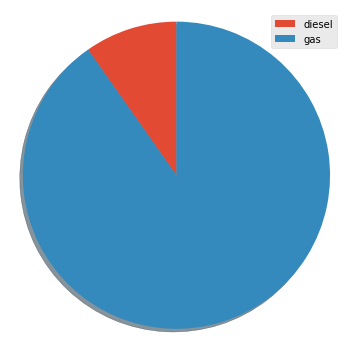

In [128]:
%matplotlib inline
plt.style.use('ggplot')
rcParams['figure.figsize'] = 5,5

labels = ['diesel','gas']
patches, texts = plt.pie(fuel,shadow=True, startangle=90)

plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()
